In [1]:
!pip install tensorflow
!pip install tqdm
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 44.5 MB/s eta 0:00:0000:01


In [80]:
##
## Setting up Data location
##
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import csv
import keras
import tensorflow 
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D
from keras.layers import MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm
from PIL import Image
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import keras
from keras import layers

#
# Note!! Anything with a path needs to be changed for one's own pc
# Changed the "/notebooks/..." for reduced_file_path and data = .pd.read_csv your own path
# If you are using paperspace this will however always function
#
data = pd.read_csv("/notebooks/DCM_File_Paths_Reduced.csv")

size_list_dir = []
finalized_list_dir = []

#Will be used for comparsion to find the ROI dcm files
Label_list = []
#Number of Images
Number_of_Images=[]
Pathology=[]
folder = []
#The counter is used to align the labels and the File Location together
counter = 0;

#Checker is to test the individual file location and how does it look as a str
checker = ''
data=data.sort_values('DCM_File_Path')

#
# The "data" variable selects either the Mass or Calc dataset
# 
print(data) #Checking if it works
#data = data[data['Label'].str.contains("Calc")] #Filtered for just Calc
#data = data[data['Label'].str.contains("Mass")] #Can pick Mass instead, comment Calc

reduced_file_path =  '/notebooks/reduced_files_3565/'
#Figuring out where to extract data
print( reduced_file_path + data['Label'].iloc[0] +"/" + os.listdir(reduced_file_path + data['Label'].iloc[0])[0])
print(data.columns)

      Unnamed: 0  index                                      DCM_File_Path  \
0              0    531  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Calc-Test...   
1              1    145  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Calc-Test...   
2              2    229  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Calc-Test...   
3              3    419  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Calc-Test...   
4              4     39  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Calc-Test...   
...          ...    ...                                                ...   
3560        3560   7000  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Trai...   
3561        3561   5846  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Trai...   
3562        3562   6415  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Trai...   
3563        3563   5406  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Trai...   
3564        3564   5156  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Trai...   

      DCM_File_Size                              Label  Number 

In [6]:
    # 
    # Data Processing
    #
    import numpy as np
    import keras
    from keras.models import Model, Sequential
    from keras.layers import Input, Dense, Conv2D
    from keras.layers import MaxPooling2D, UpSampling2D, Flatten, Reshape

    import matplotlib.pyplot as plt
    import pandas as pd

    import numpy as np
    from sklearn.preprocessing import MinMaxScaler
    from tensorflow.keras.preprocessing.image import load_img, img_to_array
    from tensorflow.keras.models import Model, Sequential
    import keras
    from keras.models import Model, Sequential
    from keras.layers import Input, Dense, Conv2D, BatchNormalization, LeakyReLU
    from keras.layers import MaxPooling2D, UpSampling2D, Flatten, Reshape
    #from keras.preprocessing.image import load_img, img_to_array
    from tensorflow.keras.regularizers import l1
    import matplotlib.pyplot as plt

    import pydicom        # install the pydicom package
    from PIL import Image # install the pillow package and it is called PIL.
    from sklearn.model_selection import train_test_split

    from matplotlib import pyplot
    # train autoencoder for classification with no compoutputression in the bottleneck layer
    import keras
    from keras import layers
    # train autoencoder for classification with no compression in the bottleneck layer
    import keras
    from keras import layers
    h = 299
    w = 299
    ch = 1



    #This is the example code that tests out dcms
    #Using the finalized_list_dir I can use my locations
    #This also means of course I can loop them, show the labels of each of them,etc

    trigger = 0
    counter = 0
    dcmMask = np.zeros((len(data),h,w,1), dtype="float")
    y_label = []


    for i in tqdm(range(0,len(data))):
        #Setting up x and y
        dicomdata = pydicom.read_file(reduced_file_path + data['Label'].iloc[i]
                                      + "/" + os.listdir(reduced_file_path + data['Label'].iloc[i])[0],force=True)  # masked image
        if data['Classification'].iloc[i]  == 'BENIGN':
            y_label.append(1)
        else:
            y_label.append(0)

        #Testing if labels and dcm align properly
        #if trigger < 5:
        #    print('This is class ',i+20,edited_df['Classification'].iloc[i+20])
        #    print('This is path ', i+20,edited_df['DCM_File_Path'].iloc[i+20])
        #    trigger+=1
        #Converting to numpy array
        tmp = np.zeros((dicomdata.Rows, dicomdata.Columns), dtype="float32")
        tmp = dicomdata.pixel_array/65535.0

        img = Image.fromarray(tmp)
        img_resize = img.resize((h,w), Image.LANCZOS)
        tmp2 = img_to_array(img_resize)
        dcmMask[i] = tmp2.reshape((h,w,ch))
        #Testing if data is set up as a 3d Rensor
        """
        if trigger != 10:
            print('this is dimension',dcmMask[i].ndim)
            print('this is shape',dcmMask[i].shape)
            print('this is type',dcmMask[i].dtype)
            print('this looks like this', dcmMask[i])
            print('this is path:',reduced_file_path + data['Label'].iloc[i]
                                      + "/" + os.listdir('/content/drive/MyDrive/reduced_files/' + data['Label'].iloc[i])[0])
            print('this is path classification:',data['Classification'].iloc[i])
            trigger+=1
        """
        #If you are interested to see all the pictures individually,increased runtime
        #data = tmp2.reshape((h,w,ch))
        #plt.imshow(np.reshape(data, (h, w)), cmap='gray')
        #plt.show()
    #print(dcmMask.shape)


  0%|          | 0/3565 [00:00<?, ?it/s]/tmp/ipykernel_32/148019414.py:71: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img_resize = img.resize((h,w), Image.LANCZOS)
100%|██████████| 3565/3565 [01:56<00:00, 30.49it/s]


In [7]:
#
# ResNet Set up
#
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50V2,EfficientNetB1,EfficientNetB2,InceptionResNetV2 	
from tensorflow.keras.layers import Input, Flatten, Dense, Lambda, Concatenate, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
import tensorflow as tf


latent_dim = 128

# Define the input shape for grayscale images
input_shape = (299, 299, 1)

# Create an input layer for grayscale images
input_layer = Input(shape=input_shape)

# Repeat the single-channel input to create a 3-channel input
rgb_input = Concatenate()([input_layer, input_layer, input_layer])

# Load the ResNet50 model with modified input
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_tensor=rgb_input)

for layer in base_model.layers[:200]:
   layer.trainable = False
for layer in base_model.layers[200:]:
   layer.trainable = True
# Remove top layers (classification layers)
ResNet_features = base_model.get_layer('block17_8_ac').output

flaten = Dense(latent_dim, name='log_sigma')(Flatten()(ResNet_features))
# Model Construction
ResNet_Model = Model(input_layer, ResNet_features, name="encoder_model")
ResNet_Model.summary()

219055592/219055592 [==============================] - 2s 0us/step
Model: "encoder_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 1  0           []                               
                                )]                                                                
                                                                                                  
 concatenate (Concatenate)      (None, 299, 299, 3)  0           ['input_1[0][0]',                
                                                                  'input_1[0][0]',                
                                                                  'input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)   

In [8]:
#
# Data augmentation
#
from keras.preprocessing.image import ImageDataGenerator

# Details of augmetation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Variables of augmentation

train_gen = datagen.flow(dcmMask,y_label,batch_size=1)
combinedImages = np.vstack((dcmMask,train_gen.x))
combinedYlabel = np.concatenate((y_label, train_gen.y), axis=0)
#
print('This is length of array: ',len(combinedYlabel))

This is length of array:  7130


In [9]:
#
# Classification Set up
#
from tensorflow.keras.layers import GlobalAveragePooling2D,Dropout
#
# Classification Set up
#
ResNet_input = Input(shape=(h,w,ch))
ResNet_output = ResNet_Model(ResNet_input)

#Classification part
x = GlobalAveragePooling2D()(ResNet_output)
x = Dropout(0.4)(x) 
output_classify = Dense(2, activation='softmax')(x)  # Output layer


classification_model = Model(inputs=ResNet_input,outputs=output_classify)
classification_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 1)]     0         
                                                                 
 encoder_model (Functional)  (None, 17, 17, 1088)      13361888  
                                                                 
 global_average_pooling2d (G  (None, 1088)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1088)              0         
                                                                 
 dense (Dense)               (None, 2)                 2178      
                                                                 
Total params: 13,364,066
Trainable params: 12,023,026
Non-trainable params: 1,341,040
_________________________________________

In [70]:
#Visual on dataset amount
count_0 = np.count_nonzero(combinedYlabel == 0)
count_1 = np.count_nonzero(combinedYlabel == 1)
sizes = [count_0,count_1]
total =  count_0 + count_1
Mag = round(count_0/total,2)*100
Ben = round(count_1/total,2)*100
label = ['Malignant ' + str(Mag) + '%','Benign ' + str(Ben) + '%' ]

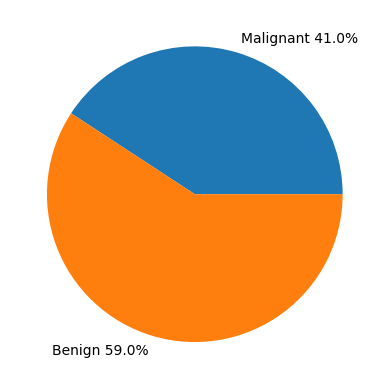

In [71]:
plt.pie(sizes,labels=label)
plt.show() 

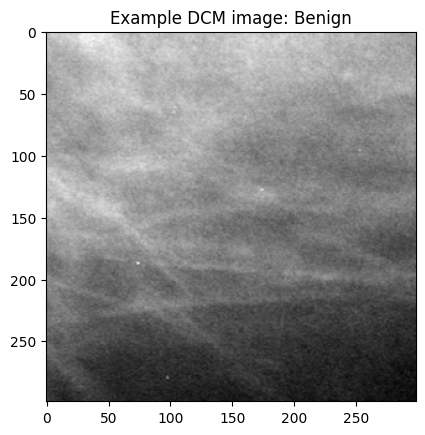

In [79]:
exampleData = combinedImages[1].reshape((h,w,ch))
plt.imshow(np.reshape(exampleData, (h, w)), cmap='gray')
if combinedYlabel[1] == 1:
    label = 'Benign'
else:
    label = 'Malignant'
plt.title("Example DCM image: " + label)
plt.show()

In [10]:
#
# Set up the split of Augmented images 50/50 as required of binary cross entropy
# Warning: Do not run this multiple times. 
#
X_train, X_test, y_train, y_test = train_test_split(combinedImages, combinedYlabel, test_size=0.50, random_state=1)

# Set up what appears to be a confusion matrix?
# Required for binary cross
from keras.utils import to_categorical
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train =to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping
def lr_schedule(epoch):
    initial_lr = 0.000145  # Initial learning rate
    drop = 0.065     # Amount to drop the learning rate
    epochs_drop = 15   # Number of epochs after which to drop the learning rate

    lr = initial_lr * (1 / (1 + drop * epoch / epochs_drop))

    return lr
lr_scheduler = LearningRateScheduler(lr_schedule)

# Create an EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=15,           
    restore_best_weights=True 
)

In [12]:
classification_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 1)]     0         
                                                                 
 encoder_model (Functional)  (None, 17, 17, 1088)      13361888  
                                                                 
 global_average_pooling2d (G  (None, 1088)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1088)              0         
                                                                 
 dense (Dense)               (None, 2)                 2178      
                                                                 
Total params: 13,364,066
Trainable params: 12,023,026
Non-trainable params: 1,341,040
_________________________________________

In [10]:
#import tensorflow as tf
#tf.keras.applications.__dict__

In [13]:
import tensorflow as tf

classification_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.000145), metrics=['accuracy'])

In [14]:
classification_model.fit(X_train, y_train, epochs=100, batch_size=50, callbacks=[lr_scheduler,early_stopping], validation_data=(X_test, y_test))

2024-02-13 01:22:21.603857: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1274858260 exceeds 10% of free system memory.
2024-02-13 01:22:23.035459: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1274858260 exceeds 10% of free system memory.


Epoch 1/100
72/72 [==============================] - ETA: 0s - loss: 0.6096 - accuracy: 0.6527

2024-02-13 01:23:20.218650: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1274858260 exceeds 10% of free system memory.
2024-02-13 01:23:21.790203: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1274858260 exceeds 10% of free system memory.


72/72 [==============================] - 78s 861ms/step - loss: 0.6096 - accuracy: 0.6527 - val_loss: 0.7694 - val_accuracy: 0.6185 - lr: 1.4500e-04
Epoch 2/100
72/72 [==============================] - 50s 701ms/step - loss: 0.4699 - accuracy: 0.7697 - val_loss: 1.3587 - val_accuracy: 0.6289 - lr: 1.4437e-04
Epoch 3/100
72/72 [==============================] - 51s 707ms/step - loss: 0.2937 - accuracy: 0.8825 - val_loss: 2.4373 - val_accuracy: 0.7173 - lr: 1.4375e-04
Epoch 4/100
72/72 [==============================] - 51s 709ms/step - loss: 0.1549 - accuracy: 0.9484 - val_loss: 0.4474 - val_accuracy: 0.8432 - lr: 1.4314e-04
Epoch 5/100
72/72 [==============================] - 51s 706ms/step - loss: 0.0880 - accuracy: 0.9717 - val_loss: 1.3428 - val_accuracy: 0.6906 - lr: 1.4253e-04
Epoch 6/100
72/72 [==============================] - 51s 707ms/step - loss: 0.0483 - accuracy: 0.9868 - val_loss: 0.7710 - val_accuracy: 0.8067 - lr: 1.4192e-04
Epoch 7/100
72/72 [===========================

In [ ]:
    #
    # Results of the classification
    # 
    plt.plot(classification_model.history.history['loss'], label='training Loss')
    plt.plot(classification_model.history.history['val_loss'], label='Validation Loss')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Curves')
    plt.legend()
    plt.show()

In [ ]:
    plt.plot(classification_model.history.history['accuracy'], label='accuracy')
    plt.plot(classification_model.history.history['val_accuracy'], label='val_accuracy')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Acc Curves')
    plt.legend()
    plt.show()

In [17]:
#
# "The second opinion" or Using transfer learning for Decision Tree methods
#
X_train, X_test, y_train, y_test = train_test_split(combinedImages , combinedYlabel, test_size=0.33, random_state=1)
X_train_encode = classification_model.predict(X_train)
X_test_encode = classification_model.predict(X_test)
print(X_train_encode.shape)

2024-02-13 02:13:49.676705: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1708274308 exceeds 10% of free system memory.


74/74 [==============================] - 11s 143ms/step
(4777, 2)


In [19]:
y_train

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
#Calculating results from Classification function

In [93]:

threshold = 0.5 
predictionsNN = (X_train_encode[:,1] > threshold).astype(int)

from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

fpr, tpr, thresholds = roc_curve(y_train, X_train_encode[:,1])
roc_auc = roc_auc_score(y_train, X_train_encode[:,1])
#Testing if alternative code works
roc_auc_testing = metrics.auc(fpr, tpr)
fprTest = fpr
tprTest = tpr
#End Testing
confMatrix = confusion_matrix(y_train, predictionsNN)
#Forumlas and Metrics
tn, fp, fn, tp = confMatrix.ravel()

tpr = tp / (tp + fn)

fpr = fp / (fp + tn)

acc = (tp + tn)/(tp+tn+fp+fn)
print("(TPR):", tpr)
print("(FPR):", fpr)
print("(AUC):", roc_auc)
print("(ACC):",acc)

(TPR): 0.9673643135863782
(FPR): 0.03830439223697651
(AUC): 0.993025131159819
(ACC): 0.9650408205987021


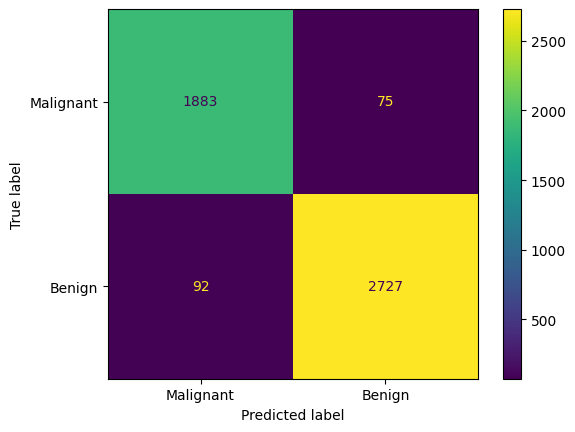

In [90]:
classes = ['Malignant','Benign']
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confMatrix,display_labels=classes)
disp.plot()

0.993025131159819


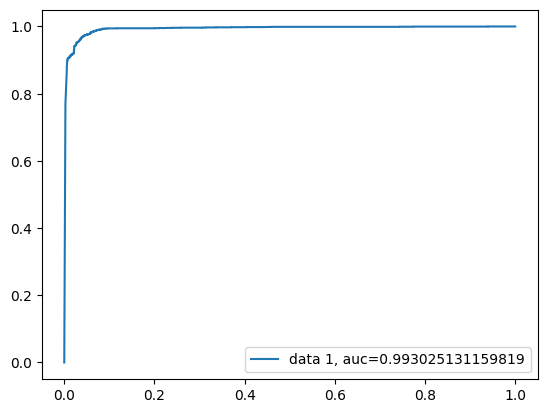

In [33]:
import sklearn.metrics as metrics
#Testing if alternative code works
print(roc_auc_testing) 
#Testing plot
plt.plot(fprTest,tprTest,label="data 1, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
#Test works, this is auc

In [21]:
# General imports
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
#Transfer Learning with Decision Tree Methods
#Interestingly, the scoring in terms of accuracy has some provements to it

In [22]:
# 
# Random Forest
#
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


param_grid = {
    'n_estimators': [500, 1000,2000],
    'max_features': [ 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy','log_loss']
}

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(RandomForestClassifier(),param_grid, cv=k_fold, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_encode, y_train)

# Print the best hyperparameters and corresponding performance
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'criterion': 'log_loss', 'max_features': 'sqrt', 'n_estimators': 500}
Best Cross-Validation Accuracy: 0.9650404170956648


In [23]:
#
# Adaboost
#
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'n_estimators': [1000,1500,2000],
    'learning_rate': [0.001, 0.0001, 0.0001],
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
    'algorithm': ['SAMME', 'SAMME.R'],
}

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(AdaBoostClassifier(),param_grid, cv=k_fold, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_encode, y_train)

# Print the best hyperparameters and corresponding performance
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Hyperparameters: {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.001, 'n_estimators': 1000}
Best Cross-Validation Accuracy: 0.963783872593047


In [24]:
#
# GradientBoosting
#

import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import GridSearchCV

param_grid = {
   'n_estimators': [1000,1500,2000],
    'learning_rate': [0.001, 0.0001, 0.0001],
    'subsample': [0.8, 0.9, 1.0],
    'warm_start' : [True,False]
}

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(GradientBoostingClassifier(),param_grid, cv=k_fold, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_encode, y_train)

# Print the best hyperparameters and corresponding performance
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'learning_rate': 0.001, 'n_estimators': 2000, 'subsample': 0.8, 'warm_start': False}
Best Cross-Validation Accuracy: 0.965039321781419
